<a href="https://colab.research.google.com/github/JS0501/ESAA_OB/blob/main/%EC%9B%B9_%EA%B4%91%EA%B3%A0_%ED%81%B4%EB%A6%AD%EB%A5%A0_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://dacon.io/competitions/official/236258/codeshare/10929

### **1. 주제 및 데이터**
#### **배경**
#### 클릭률 예측 모델은 온라인 광고 산업을 비롯하여 다양한 디지털 마케팅 분야에서 광범위하게 활용되며, 실제 비즈니스 시나리오에서의 적용을 통해 매출 증대와 마케팅 효율성을 극대화할 수 있다. 다만 이런 클릭률 예측을 위한 웹 로그 데이터는 대용량, 클래스 불균형, 고차원 등을 특징으로 가지는 경우가 많다.

#### **주제**
#### 광고 클릭률을 예측하는 AI 모델 개발

#### **데이터**
#### - train.csv
#### 시간 순으로 나열된 **7일** 동안의 웹 광고 클릭 로그
#### 1) ID: train 데이터 샘플 고유 ID
#### 2) Click: 예측 목표인 클릭 여부 (0: 클릭x 1: 클릭)
#### 3) F01~F39: 각 클릭 로그와 연관된 feature
#### 4) 개인정보 보호를 위해 상세 정보는 비식별 처리됨
#### - train.csv
#### 시간 순으로 나열된 **1일** 동안의 웹 광고 클릭 로그
#### train 데이터의 다음 날에 해당
#### Click이 존재하지 않아, 이를 예측하는 것이 목표
#### 1) ID: test 데이터 샘플 고유 ID
#### 2) F01~F39: 각 클릭 로그와 연관된 feature
#### 3) 개인정보 보호를 위해 상세 정보는 비식별 처리됨
#### - sample_submission.csv
#### 제출 양식
#### 1) ID: test 데이터 샘플 고유 ID
#### 2) Click: 각 샘플에 대해서 예측한 클릭 확률을 기입하여 제출

### **2. 코드 분석**

#### **전처리**
#### 1) 범주형 변수는 고차원 데이터로 Count Encoder를 활용한 Frequency Encoding 진행
#### 2) 수치형 변수는 최빈값인 0으로 결측치를 대체
#### 3) 데이터는 전처리 후 Parquet 파일로 저장 후 사용
#### 4) 변수 중요도가 높은 변수를 기준으로 범주형 변수에 대한 수치형 변수의 평균 등 기초 통계량 파생 변수 생성

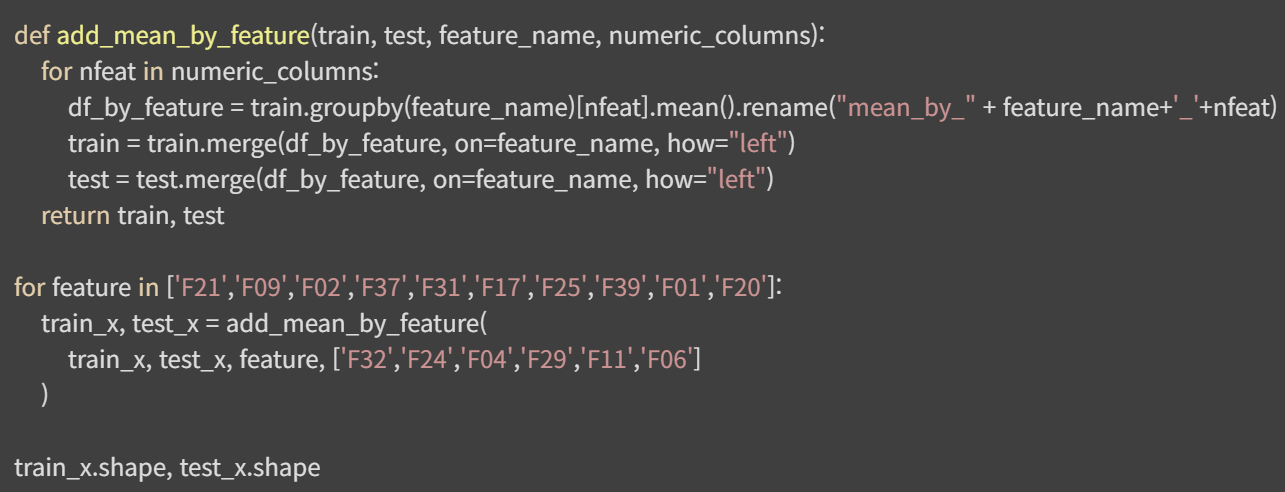

#### **모델 적합**
#### 총 3개의 Boosting 예측 모형을 스태킹
#### Level 0 model: XGBoost, LightGBM, Catboost
#### Level 1 model: Logistic Regression

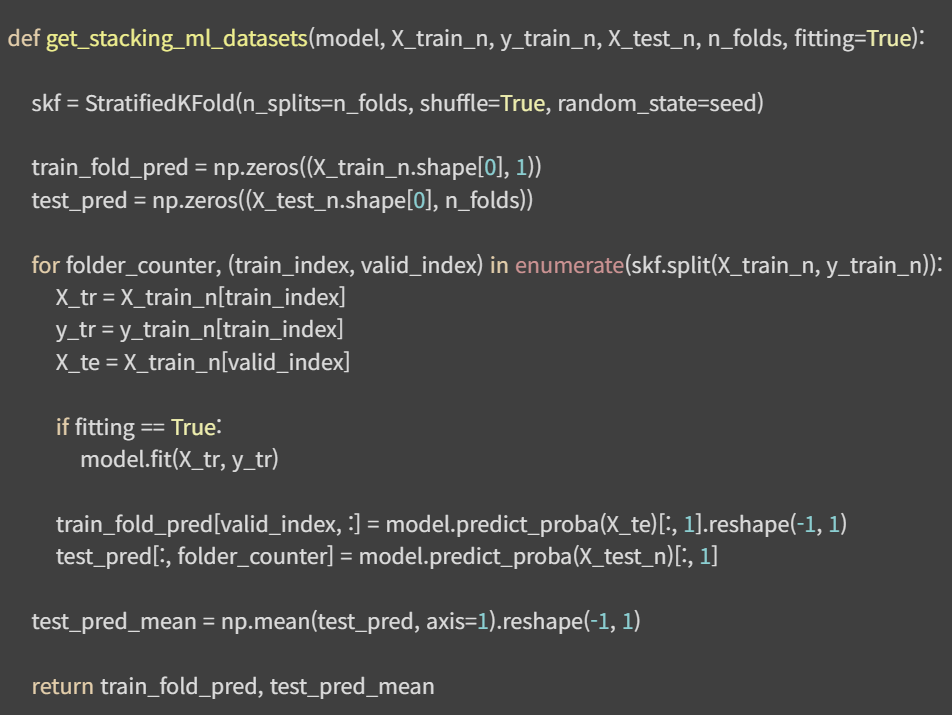

### **3. 차별점 및 배울점**

#### **차별점**
#### 범주형 변수가 고차원이기에 count encoder를 활용한 frequency encoding을 진행함
#### **<Frequency Encoding>**
#### 1) 기존 열을 유지하면서 각 범주를 해당 범주의 등장 횟수로 대체하므로 차원 수가 증가하지 않음
#### 2) 고차원 범주형 변수에 효과적
#### 3) 모든 모델과 호환 가능
#### 4) 간단한 구현
#### 5) 정보 손실 가능성

#### **배울점**
#### **Parquet**는 열(column) 기반 파일 포맷으로, 행 단위가 아니라 열 단위로 저장됨. 각 컬럼마다 비슷한 타입의 데이터가 연속적으로 배치되기 때문에 압축 및 효율적 읽기가 가능
#### **Count Encoder**는 범주형 변수를 각 범주의 등장 횟수 또는 빈도로 치환하는 기법
#### 차원 폭발을 방지하고, 모델이 범주의 크기/popularity 정보 이용 가능